In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import fastq as fq
import tqdm
import re
import sys
import seaborn as sns
import scipy.stats
import os
import msprime
import pysam

# This is needed before pybedtools to make sure bedtools is imported on sanger JupyterHub 
os.environ["PATH"] += ":" + os.path.join(sys.prefix, "bin")
import pybedtools


In [3]:
sys.path.append("/nfs/users/nfs_r/rs42/rs42/git/hapfusion/src")
sys.path.append("/nfs/users/nfs_r/rs42/rs42/git/himut/src")

sys.path.append(str(Path(os.getcwd()).parent))
from src import liftover, annotate, data, diagnostics

In [4]:
import hapfusion
import himut

# Which samples?

In [5]:
aut_chrom_names = [f"chr{i}" for i in list(range(1, 23))]
chrom_names = aut_chrom_names + ["chrX", "chrY"]

In [6]:
sample_ids = [
    "PD50477f",
    # "PD50508bf", -- ignore; merged two sampling dates just for phasing, but should be analyzed separately
    "PD50519d",
    # "PD47269d", -- don't use, not there
    "PD50508f",
    # "PD50511e", -- don't use, likely mixture
    "PD50523b",
    # "PD48473b", -- don't use, not there
    "PD50521b",
    "PD50508b",
    # "PD50521be", -- ignore; merged two sampling dates just for phasing, but should be analyzed separately
    "PD46180c",
    # "PD50502f", -- don't use, likely mixture
    "PD50521e",
    # "PD50511e_SS",  --- don't use
    "PD50489e",
]

# Look at a single event

In [7]:
sample_id = "PD50523b"
chrom = "chr1"

In [8]:
reads_df = data.t2t_load_files(sample_id)["reads"]
reads_df = annotate.annonate_with_mappability_mask(reads_df)
reads_df = annotate.annotate_with_cm_ranges(reads_df) 
reads_df = annotate.annotate_with_crossover_detection_prob(
    reads_df,
    annotate.get_all_hets(sample_id, chrom)
)

In [17]:
focal_event = reads_df[(reads_df["accessible_ratio"]>0.8) & (reads_df["event"] == "CO")].iloc[3]

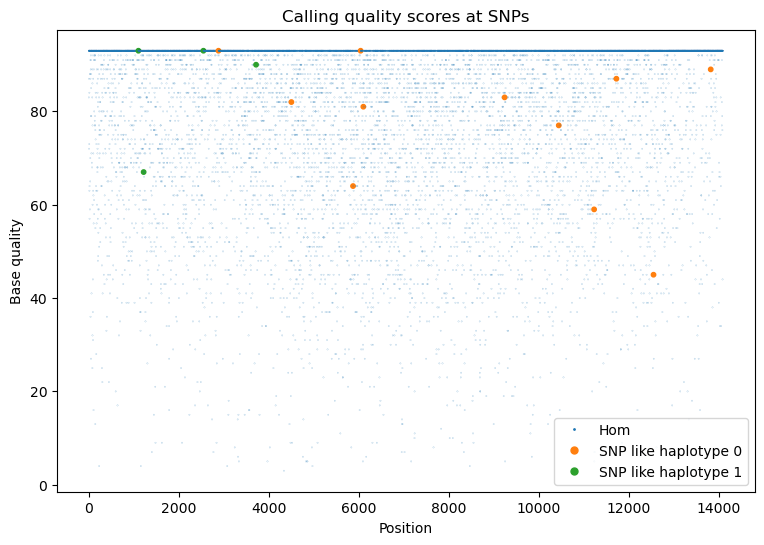

In [18]:
diagnostics.diagnose_events(sample_id, focal_event)